# Assignment 01 : Linear Regression

# Question 01

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt


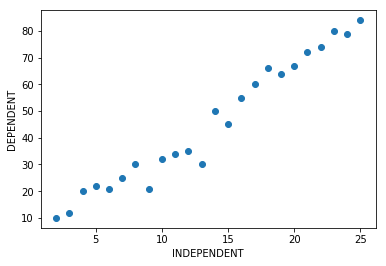

In [7]:
x=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
y=[10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]
plt.ylabel("DEPENDENT")
plt.xlabel("INDEPENDENT")
plt.scatter(x,y)
plt.show()

In [18]:
def slope_intercept(x_val,y_val):
    x=np.array(x_val)
    y=np.array(y_val)
    
    m=((np.mean(x)*np.mean(y))-np.mean(x*y)) / ((np.mean(x)*np.mean(x))-np.mean(x*x))
    m=round(m,2)
    b=(np.mean(y)-np.mean(x)*m)
    b=round(b,2)
    return m,b

In [19]:
slope_intercept(x,y)

(3.29, 0.92)

In [24]:
m,b=slope_intercept(x,y)

In [27]:
reg_line=[(m*x)+b for x in x]

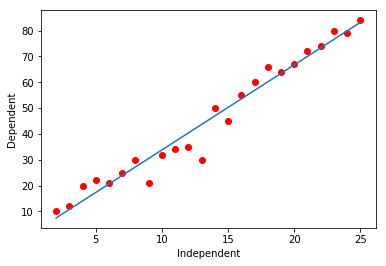

In [28]:
plt.ylabel("Dependent")
plt.xlabel("Independent")
plt.scatter(x,y,color="red")
plt.plot(x,reg_line)
plt.show()

In [31]:
def rmse(y1,y_after):
    y_actual=np.array(y1)
    y_pred=np.array(y_after)
    error=(y_actual-y_after)**2
    error_mean=round(np.mean(error))
    err_sq=sqrt(error_mean)
    return err_sq

In [34]:
rmse(y,reg_line)

4.58257569495584

# Question 2  Boston Dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.cross_validation import train_test_split
import sklearn
from sklearn import linear_model

In [26]:
from sklearn.datasets import load_boston

In [27]:
boston=load_boston()

In [28]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [29]:
boston.data.shape

(506, 13)

In [10]:

print(boston.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [30]:
bostonDF=pd.DataFrame(boston.data)
bostonDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
bostonDF.columns=boston.feature_names
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
df_x=pd.DataFrame(boston.data,columns=boston.feature_names)
df_y=pd.DataFrame(boston.target)

In [33]:
regr=linear_model.LinearRegression()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [39]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


In [36]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
regr.intercept_

array([35.60325757])

In [38]:
print("Regression Coefficient: \n",regr.coef_)
print("MSE %0.2f" % np.mean((regr.predict(x_test)-y_test)**2))
print("variance score %0.2f" % regr.score(x_test,y_test))

Regression Coefficient: 
 [[-1.14743504e-01  4.70875035e-02  8.70282354e-03  3.23818824e+00
  -1.67240567e+01  3.87662996e+00 -1.08218769e-02 -1.54144627e+00
   2.92604151e-01 -1.33989537e-02 -9.07306805e-01  8.91271054e-03
  -4.58747039e-01]]
MSE 25.41
variance score 0.73


# Practice Question 

In [41]:
x1=np.array([[0.1227,0.2990],[0.3914,0.6392],[0.7725,0.0826],[0.8342,0.0823],[0.5084,0.8025],[0.9983,0.7404]])
y=np.array([0.1825,0.8882,-1.9521,-1.9328,1.2246,-0.0631])

In [42]:
x_df=pd.DataFrame(x1)

In [43]:
x_df.head()

,0,1
0,0.1227,0.2990
1,0.3914,0.6392
2,0.7725,0.0826
3,0.8342,0.0823
4,0.5084,0.8025


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=4)

In [45]:
regr=linear_model.LinearRegression()

In [46]:
x_train.head()

,0,1
3,0.8342,0.0823
0,0.1227,0.2990
1,0.3914,0.6392
2,0.7725,0.0826


In [47]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
regr.intercept_

-0.6769467252422078

In [49]:
print("Regression Coefficient: \n",regr.coef_)
print("MSE %0.2f" % np.mean((regr.predict(x_test)-y_test)**2))
print("variance score %0.2f" % regr.score(x_test,y_test))

Regression Coefficient: 
 [-1.94623312  3.64532509]
MSE 0.01
variance score 0.97
